# Chromatic Effect

Again, using the paraxial approximation of the transverse Hamiltonian: 
\begin{equation}
K\left(x, p_x, y, p_y, z, \delta,s\right)=
-\left(1+\frac{x}{\rho}\right)\left(1+\delta-\frac{p_x^2}{2(1+\delta)}-\frac{p_y^2}{2(1+\delta)}\right)
-e\frac{A_s}{p_0}\left(1+\frac{x}{\rho}\right)
\end{equation}



If we keep only the quadratic terms which contains transverse coordinates $(x, p_x, y, p_y)$ while treating the energy deviation $\delta$ as a parameter, we get the energy dependent equation of motion and the definition of dispersion function.

\begin{align}
K\left(x, p_x, y, p_y, z, \delta,s\right)
&=
-\left(1+\frac{x}{\rho}\right)\left(1+\delta-\frac{p_x^2}{2(1+\delta)}-\frac{p_y^2}{2(1+\delta)}\right)
-e\frac{A_s}{p_0}\left(1+\frac{x}{\rho}\right)\\
&=\frac{p_x^2}{2(1+\delta)}+\frac{p_y^2}{2(1+\delta)}-\frac{x}{\rho}\delta + \frac{1}{2}K_x(s)x^2+\frac{1}{2}K_y(s)y^2
\end{align}

Where,
\begin{align}
K_x(s)&=\frac{1}{\rho^2}+k(s)\\
K_y(s)&=-k(s)
\end{align}

Then the equation of motion are simply:

\begin{align}
x''(s)+\frac{K_x(s)}{1+\delta}x(s)&=\frac{\delta}{1+\delta}\frac{1}{\rho}\\
y''(s)+\frac{K_y(s)}{1+\delta}y(s)&=0
\end{align}

## Chromaticity

The energy deviation of the particle can be effectly treated as the quadrupole error.  The effective quad error is 
\begin{align}
\Delta K_x&=-K_x \delta \\
\Delta K_y&=-K_y \delta
\end{align}

The tune change due to the energy deviation is given by:
\begin{align}
\Delta \nu_x&=\frac{1}{4\pi}\oint \beta_x \Delta K_x ds=\left(-\frac{1}{4\pi}\oint\beta_x K_xds\right) \delta \\
\Delta \nu_y&=\frac{1}{4\pi}\oint \beta_y \Delta K_y ds=\left(-\frac{1}{4\pi}\oint\beta_y K_yds\right) \delta
\end{align}

The quantities in the above parenthesis is defined as ***chromaticity*** $\xi_{x/y}$.

\begin{align}
\xi_{x/y}=-\frac{1}{4\pi}\oint\beta_{x/y} K_{x/y}ds\\
\end{align}

We see that chromaticity can be raised solely by linear lattice. This chromaticity is named ***natural chromaticity***. We can derive that for FODO cell, the natural chromaticity can be approximated by its transverse tune.

Since the chromaticity denotes the tune change due to the energy/momentum deviation, we can write the one-turn transfer map for the particle with energy/momentum deviation $\delta$.

\begin{align}
\left(\begin{array}{cc}
\cos2\pi\left(\nu+\xi\delta\right)+\alpha\sin2\pi\left(\nu+\xi\delta\right) & \beta\sin2\pi\left(\nu+\xi\delta\right)\\
-\gamma\sin2\pi\left(\nu+\xi\delta\right) & \cos2\pi\left(\nu+\xi\delta\right)-\alpha\sin2\pi\left(\nu+\xi\delta\right)
\end{array}\right)
\end{align}


A direct consequence of chromaticity and energy spread is ***decoherence*** which can be directly observed in accelerator using beam position monitors.  Suppose the beam receives a delta transverse kick at location $s_0$, the beam centroid will keep oscillating with the kick as initial condition, if all particles has the same phase advance  
\begin{align}
x_c(s)=\frac{1}{N_b}\sum x_i(s) = \Delta x(s_0) m_{12}(s-s_0)
\end{align}

However, when the chromatic effect presents, the centroid becomes:
\begin{align}
x_c(s)&=\frac{1}{N_b}\sum x_i(s) \\
&= \frac{\Delta x(s_0)}{N_b} \sum_i m_{12}(s-s_0,\xi\delta_i)\\
&= \frac{\Delta x(s_0)}{N_b}\sqrt{\beta(s_0)\beta(s)} \sum_i \sin(\phi(s)-\phi(s_0)+\xi\delta_i)
\end{align}

The below example shows the effect of decoherence.

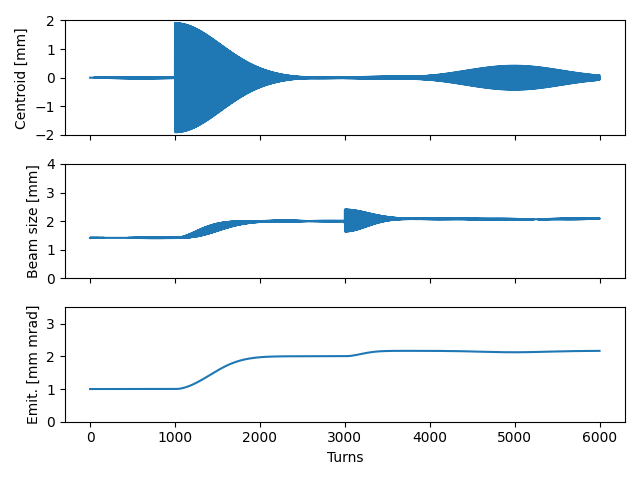

In [1]:

from map2D import map2D
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib import animation
#from IPython.display import HTML
%matplotlib widget

chrom_example=map2D(npart=10000, twiss=[2,0], twiss_beam=[2,0],tune=0.3, chrom=3, espr=1e-4)
avex,avep,sizex,sizep,emit=chrom_example.statistics()
emitlist=[]
sizelist=[]
avelist=[]
N_turn=6000

def evolve_func(turns, kick_turn=1000, kick_angle=1.0e-3,
               quad_kick_turn=3000, invf = 0.2
               ):
    for i in range(turns):
        if i==kick_turn:
            chrom_example.coor2D[1,:]+=kick_angle/(1.0+chrom_example.espread)
            
        if i==quad_kick_turn:
            chrom_example.coor2D[1,:]+=invf*chrom_example.coor2D[0,:]
        chrom_example.propagate()
        
        avex,avep,sizex,sizep,emit=chrom_example.statistics()
        avelist.append(avex)
        sizelist.append(sizex)
        emitlist.append(emit)
        yield chrom_example.coor2D
        
evolve=evolve_func(N_turn+2)
    
for i in range(N_turn):
    arr=next(evolve)
    
fig1,(ax1,ax2,ax3)=plt.subplots(3,1, sharex= True)
ax3.set_xlabel("Turns")
ax1.set_ylabel("Centroid [mm]")
ax2.set_ylabel("Beam size [mm]")
ax3.set_ylabel("Emit. [mm mrad]")
ax1.plot(np.array(avelist)*1e3)  
ax1.set_ylim([-2,2])
ax2.plot(np.array(sizelist)*1e3) 
ax2.set_ylim([0,4])
ax3.set_ylim([0,3.5])
ax3.plot(np.array(emitlist)*1e6) 
fig1.tight_layout()


#fig,ax=plt.subplots()
#line,=ax.plot(chrom_example.arrayxy[0],chrom_example.arrayxy[1], linestyle='',marker='.')


#def animate(i):
#    arr=next(evolve)
#    line.set_data(arr[0],arr[1])
#    return (line,)

#anim = animation.FuncAnimation(fig, animate,
#                               frames=N_turn, interval=20, 
#                               blit=True)
#HTML(anim.to_html5_video())

In addition, a large chromaticity with the beam energy spread may induce wide enough tune spread to induce nonlinear resonances.  Also the sign of chromaticity is important in the growth rate of the 'head-tail instability', one type of collective instabilities in accelerator.

## Chromatic Correction

For low-$\beta$ lattice, the natural chromaticity is usually large.  For example, the RHIC has natural chromaticity of -50 units for injection lattice.  The large natural chromaticity $\xi_n$ has three intermediate consequences:
* Large absolute value of $\xi_n$ causes large tune spread and possibly strong nonlinear resonances.  
* Large absolute value of $\xi_n$ causes beam quality degradation in presence of the dipole error.  
* For above-transition particles, a negative chromaticity causes head-tail instability and vice-versa.

Therefore we have to find ways to correct large $\xi_n$


Since the quadrupole loose it focusing strength if the energy deviation of the particle is positive.  Therefore we need a magnet whose focusing strength increases when the energy deviation increases.  Meanwhile, the correction of chromaticity should not change the optics and tune of the existing linear lattice.  

Therefore,we try to examine the effect of a sextrupole on the chromatic correction.  For a sextrupole field we have:
\begin{align}
B_x&=B_2 xy \\
B_y&=\frac{B_2}{2}\left(x^2-y^2\right) 
\end{align}
where $B_2=\frac{\partial^2 B_x}{\partial x^2}$.  If we define the effective sextrupole strength $S(s)=-\frac{B_2}{B\rho}$, for a particle with betatron oscillation and off-momentum orbit $x(s)=x_\beta(s)+D\delta$, we have 
\begin{align}
\frac{\Delta B_x}{B\rho}&=-S(s)\left(x_\beta +D\delta\right)y &&=-\left(S\left(s\right)D\delta\right)y - S\left(s\right)x_\beta y\\
\frac{\Delta B_y}{B\rho}&=-S(s)\left(\left(x_\beta +D\delta\right)^2-y^2\right) &&=-\left(S\left(s\right)D\delta\right)x_\beta - \frac{S\left(s\right)}{2}\left(x_\beta^2-y^2\right)-\frac{S\left(s\right)}{2} D^2\delta^2
\end{align}
And we do achieve a 'energy dependent focusing term', $K_{S,x}$ and $K_{S,y}$, which can be used to correct chromaticity:
\begin{align}
K_{S,x}&=S(s)D\delta \\
K_{S,y}&=-S(s)D\delta
\end{align}


Therefore the chromaticity is then contributed from the quadrupoles and the sextrupole in dispersive region:

\begin{align}
\xi_x&=-\frac{1}{4\pi}\oint\beta_x\left( K_x\left(s\right)-S\left(s\right)D\left(s\right)\right)ds\\
\xi_y&=-\frac{1}{4\pi}\oint\beta_y\left( K_y\left(s\right) +S\left(s\right)D\left(s\right)\right)ds
\end{align}

It is easy to learn that to correct chromaticity in both directions, we need two independent families of sextrupoles located near the quadrupoles, where the dispersion and beta functions reaches its maximum.